### Author Name : Ashutosh Lande

### TASK- Develop A Neural Network That Can Read Handwriting 

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning. It was created by "re-mixing" the samples from NIST's original datasets. The creators felt that since NIST's training dataset was taken from American Census Bureau employees, while the testing dataset was taken from American high school students, it was not well-suited for machine learning experiments.Furthermore, the black and white images from NIST were normalized to fit into a 28x28 pixel bounding box and anti-aliased, which introduced grayscale levels.

The MNIST database contains 60,000 training images and 10,000 testing images.Half of the training set and half of the test set were taken from NIST's training dataset, while the other half of the training set and the other half of the test set were taken from NIST's testing dataset.The original creators of the database keep a list of some of the methods tested on it. In their original paper, they use a support-vector machine to get an error rate of 0.8%.

Extended MNIST (EMNIST) is a newer dataset developed and released by NIST to be the (final) successor to MNIST. MNIST included images only of handwritten digits. EMNIST includes all the images from NIST Special Database 19, which is a large database of handwritten uppercase and lower case letters as well as digits. The images in EMNIST were converted into the same 28x28 pixel format, by the same process, as were the MNIST images. Accordingly, tools which work with the older, smaller, MNIST dataset will likely work unmodified with EMNIST.

 - Begin my neural network machine learning project with the MNIST Handwritten Digit Classification Challenge and using   Tensorflow and CNN. 
 - It has a very user-friendly interface that’s ideal for beginners.

Dataset link : https://en.wikipedia.org/wiki/MNIST_database

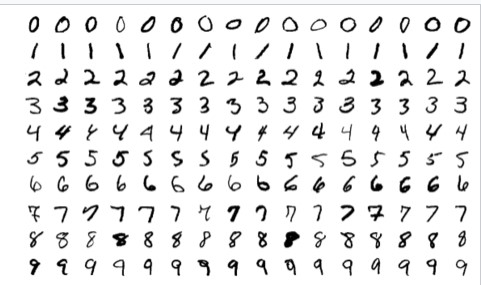

## Importing Libraries

In [3]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten,Activation
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

## Loading dataset

In [8]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

## Plotting count plot

C:\Users\ashutosh_lande\Splash\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

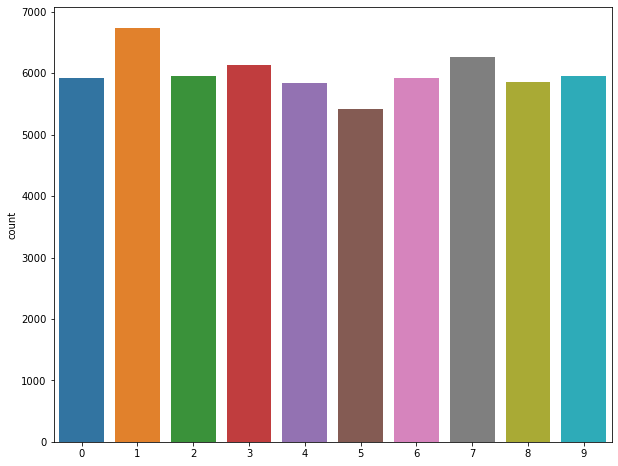

In [9]:
plt.figure(figsize = (10,8))
sns.countplot(y_train)

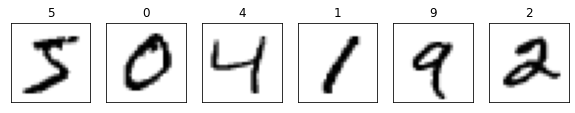

In [10]:
fig, axes = plt.subplots(ncols=6, sharex=False, 
    sharey=True, figsize=(10, 4))
for i in range(6):
    axes[i].set_title(y_train[i])
    axes[i].imshow(x_train[i], cmap='gray_r')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

### Pre-processing the data

In [11]:
print('Training images shape : ',x_train.shape)
print('Testing images shape : ',x_test.shape)

Training images shape :  (60000, 28, 28)
Testing images shape :  (10000, 28, 28)


In [18]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [19]:
x_train=x_train/255.0
x_testg=x_test/255.0
num_classes = 10

### Creating the model
### Model Architecture

We will have to first build the model architecture and define it based on our dataset. We are going to add the following layers:

1. Conv2D - for the convolution layers

2. Dropout - to prevent overfitting

3. Dense - a fully connected layer

4. Softmax activation - This is used to convert all predictions into probability The model architecture can be tuned to get optimal performance

so i am goimg to create a model with



#### CNN + Three layers + relu + (3,3) kernel_size + Dropout rate (0.3)

In [20]:
model = Sequential()

model.add(Conv2D(128, kernel_size=(3, 3),
                 activation=tf.nn.relu,
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation=tf.nn.relu))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(32, (3, 3), activation=tf.nn.relu))
model.add(BatchNormalization())
model.add(Dropout(0.3))


model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation=tf.nn.softmax))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 128)       1280      
                                                                 
 batch_normalization_3 (Batc  (None, 26, 26, 128)      512       
 hNormalization)                                                 
                                                                 
 dropout_5 (Dropout)         (None, 26, 26, 128)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 64)        73792     
                                                                 
 batch_normalization_4 (Batc  (None, 24, 24, 64)       256       
 hNormalization)                                                 
                                                                 
 dropout_6 (Dropout)         (None, 24, 24, 64)       

In [21]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
history=model.fit(x=x_train,
                  y=y_train,
                  validation_split=0.1,
                  epochs=10)

Epoch 1/10
1688/1688 [==============================] - 591s 349ms/step - loss: 0.3128 - accuracy: 0.9093 - val_loss: 0.1059 - val_accuracy: 0.9713
Epoch 2/10
1688/1688 [==============================] - 588s 348ms/step - loss: 0.1234 - accuracy: 0.9638 - val_loss: 0.0921 - val_accuracy: 0.9800
Epoch 3/10
1688/1688 [==============================] - 534s 317ms/step - loss: 0.0975 - accuracy: 0.9712 - val_loss: 0.1614 - val_accuracy: 0.9725
Epoch 4/10
1688/1688 [==============================] - 530s 314ms/step - loss: 0.0843 - accuracy: 0.9758 - val_loss: 0.0872 - val_accuracy: 0.9855
Epoch 5/10
1688/1688 [==============================] - 540s 320ms/step - loss: 0.0737 - accuracy: 0.9783 - val_loss: 0.1327 - val_accuracy: 0.9808
Epoch 6/10
1688/1688 [==============================] - 458s 271ms/step - loss: 0.0629 - accuracy: 0.9811 - val_loss: 0.2089 - val_accuracy: 0.9690
Epoch 7/10
1688/1688 [==============================] - 284s 168ms/step - loss: 0.0601 - accuracy: 0.9823 - val_

In [22]:
model.save('MNproject.h5')

In [23]:
from tensorflow.keras.models import load_model
model = load_model('MNproject.h5')

### Evaluating the model

In [24]:
loss_and_acc=model.evaluate(x_test,y_test)
print("Test Loss", loss_and_acc[0])
print("Test Accuracy", loss_and_acc[1])

313/313 [==============================] - 6s 20ms/step - loss: 1165.0354 - accuracy: 0.9643
Test Loss 1165.035400390625
Test Accuracy 0.9642999768257141


### Plotting Training & Validation plots

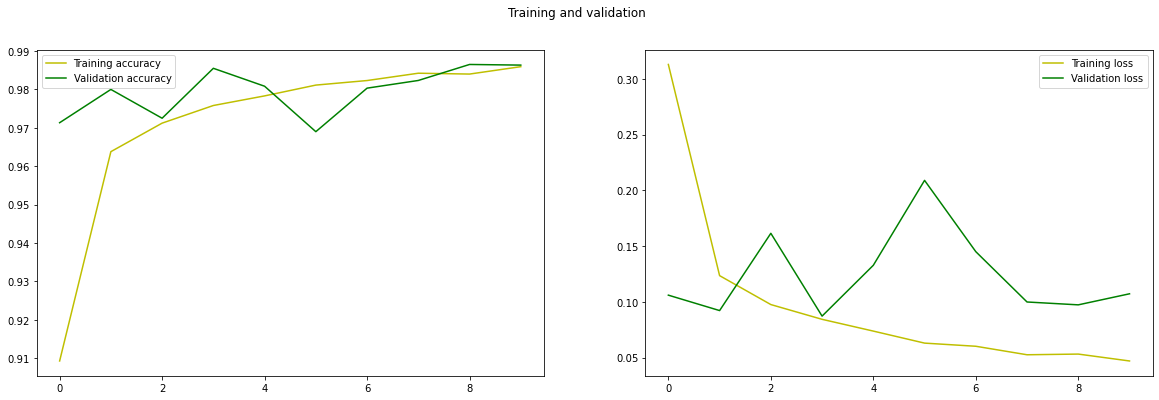

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
ax[0].plot(epochs, acc, 'y', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'g', label='Validation accuracy')
ax[0].legend(loc=0)
ax[1].plot(epochs, loss, 'y', label='Training loss')
ax[1].plot(epochs, val_loss, 'g', label='Validation loss')
ax[1].legend(loc=0)

plt.suptitle('Training and validation')
plt.show()

In [26]:
y_predicted = model.predict(x_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

313/313 [==============================] - 10s 30ms/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 971,    0,    2,    0,    0,    0,    1,    2,    4,    0],
       [   6, 1039,    2,    5,    2,    1,    0,   10,   66,    4],
       [   2,    0, 1008,    6,    0,    0,    0,   12,    4,    0],
       [   0,    0,    4,  995,    0,    0,    0,    1,    9,    1],
       [   0,    1,    3,    1,  921,    0,    1,    3,   15,   37],
       [   0,    0,    4,   27,    0,  809,    5,    0,   45,    2],
       [   4,    0,    3,    1,    4,    0,  926,    0,   20,    0],
       [   0,    1,    3,    0,    1,    0,    0, 1016,    2,    5],
       [   1,    0,    1,    0,    0,    0,    0,    2,  969,    1],
       [   0,    0,    1,    1,    1,    1,    1,    7,    8,  989]])>

### Plotting heat map

Text(69.0, 0.5, 'Truth')

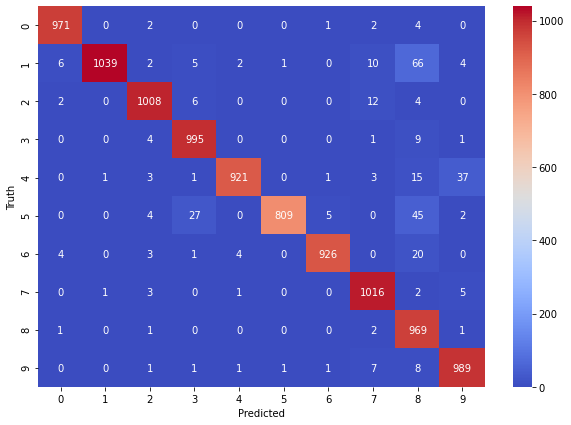

In [27]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap = 'coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Testing the Model

313/313 [==============================] - 8s 25ms/step
Predicted Value:  9
Successful prediction


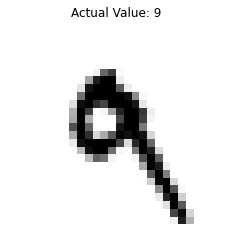

In [28]:
plt.imshow(x_test[7],cmap='gray_r')
plt.title('Actual Value: {}'.format(y_test[7]))
prediction=model.predict(x_test)

plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[7]))
if(y_test[7]==(np.argmax(prediction[7]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')

313/313 [==============================] - 10s 33ms/step
Predicted Value:  2
Successful prediction


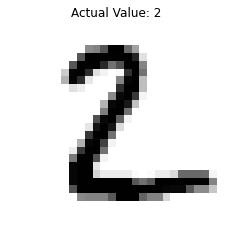

In [29]:
plt.imshow(x_test[1],cmap='gray_r')
plt.title('Actual Value: {}'.format(y_test[1]))
prediction=model.predict(x_test)
plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[1]))
if(y_test[1]==(np.argmax(prediction[1]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')

### Model Has been successfully tested